# Finite volume discretization of unsteady two-dimensional advection-diffusion equation

The equation we would like to solve numerically is the following:
$$\rho \frac{\partial \phi}{\partial t} + \rho u_j \frac{\partial \phi}{\partial x_j} = \frac{\partial}{\partial x_j} \biggl(\Gamma \frac{\partial\phi}{\partial x_j}\biggr) + S $$

In two-dimensions the partial derivatives are expanded as:
$$\rho \frac{\partial \phi}{\partial t} + \rho u_x \frac{\partial \phi}{\partial x} + \rho u_y \frac{\partial \phi}{\partial y} = \frac{\partial}{\partial x} \biggl(\Gamma \frac{\partial\phi}{\partial x}\biggr) +\frac{\partial}{\partial y} \biggl(\Gamma \frac{\partial\phi}{\partial y}\biggr) + S $$


In what follows the source term is taken to be zero $S=0$:
$$\rho \frac{\partial \phi}{\partial t} + \rho u_x \frac{\partial \phi}{\partial x} + \rho u_y \frac{\partial \phi}{\partial y} = \frac{\partial}{\partial x} \biggl(\Gamma \frac{\partial\phi}{\partial x}\biggr) +\frac{\partial}{\partial y} \biggl(\Gamma \frac{\partial\phi}{\partial y}\biggr) $$

## Unsteady purely conduction equation

We will start with unsteady purely conduction equation:
$$\rho \frac{\partial \phi}{\partial t} = \frac{\partial}{\partial x}\biggl(\Gamma \frac{\partial \phi}{\partial x}\biggr) + \frac{\partial}{\partial y}\biggl(\Gamma \frac{\partial \phi}{\partial y}\biggr)$$

Let's integrate this equation over the control volume:
$$\rho \int_w^e\int_s^n \frac{\partial \phi}{\partial t} dx dy = \int_w^e\int_s^n \frac{\partial}{\partial x} \biggl(\Gamma \frac{\partial \phi}{\partial x}\biggr) dx dy + \int_w^e\int_s^n \frac{\partial}{\partial y} \biggl(\Gamma \frac{\partial \phi}{\partial y}\biggr) dx dy$$

![alt text](integration.png "2D control volume")

The integration leads to the following:
$$\rho \Delta x_P \Delta y_P \frac{\partial}{\partial t} \phi_P   = \Delta y_P \biggl(\Gamma_e \Bigl(\frac{\partial\phi}{\partial x}\Bigr)_e-\Gamma_w \Bigl(\frac{\partial\phi}{\partial y}\Bigr)_w\biggr) + \Delta x_P \biggl(\Gamma_n \Bigl(\frac{\partial\phi}{\partial y}\Bigr)_n-\Gamma_s \Bigl(\frac{\partial\phi}{\partial y}\Bigr)_s\biggr)$$

Assume that the partial derivatives can be represented through forward difference:
$$\Bigl(\frac{\partial \phi}{\partial x}\Bigr)_e = \frac{\phi_E - \phi_P}{\Delta x_e}$$
$$\Bigl(\frac{\partial \phi}{\partial x}\Bigr)_w = \frac{\phi_P - \phi_W}{\Delta x_w}$$
$$\Bigl(\frac{\partial \phi}{\partial y}\Bigr)_n = \frac{\phi_N - \phi_P}{\Delta y_n}$$
$$\Bigl(\frac{\partial \phi}{\partial y}\Bigr)_s = \frac{\phi_P - \phi_S}{\Delta y_s}$$,
where $\Delta x_P = 0.5(\Delta x_e + \Delta x_w)$ and $\Delta y_P = 0.5(\Delta y_n + \Delta y_s)$


Thus, after substitution in the numerical equation the following is obtained:
$$\rho \Delta x_P \Delta y_P \frac{\partial}{\partial t}\phi_P = \Delta y_P \biggl(\Gamma_e \frac{\phi_E - \phi_P}{\Delta x_e} - \Gamma_w \frac{\phi_P-\phi_W}{\Delta x_w}\biggr)+\Delta x_P \biggl(\Gamma_n \frac{\phi_N-\phi_P}{\Delta y_n}-\Gamma_s \frac{\phi_P - \phi_S}{\Delta y_s}\biggr)$$

Let's combine the terms accordingly:
$$\rho \Delta x_P \Delta y_P \frac{\partial}{\partial t}\phi_P = \phi_P \biggl(-\Gamma_e\frac{\Delta y_P}{\Delta x_e}-\Gamma_w \frac{\Delta y_P}{\Delta x_w}-\Gamma_n \frac{\Delta x_P}{\Delta y_n} - \Gamma_s \frac{\Delta x_P}{\Delta y_s}\biggr) + \phi_E \Gamma_e \frac{\Delta y_P}{\Delta x_e} + \phi_W \Gamma_w \frac{\Delta y_P}{\Delta x_w} + \phi_S \Gamma_s \frac{\Delta x_P}{\Delta y_s} + \phi_N \Gamma_n \frac{\Delta x_P}{\Delta y_n}$$

Now the problem which we would like to solve is a slab with two constraints $\phi(x=0,y)=1$ and $\phi(x=L,y)=0$. As this problem is two-dimensional, we will impose two adiabatic boundary conditions on top and the bottom of the domain, i.e. $\frac{\partial \phi(x,y=0)}{\partial y}=0$ and $\frac{\partial \phi(x,y=H)}{\partial y}=0$. 

To derive boundary conditions we need to introduce the control volume near boundaries. The points are placed in the center of control volumes, so the boundary conditions are naturally involved.

![alt text](boundary_volumes.png?arg "Boundary control volumes")

Now, let's try to compose the matrix assuming the following quantities: $\rho = 1$, $\Gamma=1$, $L=1$, $H=2$. The numerical domain for points will be taken as $0..NX+1$ and $0..NY+1$, where $NX=10$ and $NY=20$. Then we will have $\Delta x =\frac{L}{NX} = 0.1$ and $\Delta y = \frac{H}{NY} = 0.1$. Notice that points close to boundaries will have only half distance of $0.5 \Delta x$ and $0.5 \Delta y$. So the coordinates will be distributed in the following way:

$$
\begin{aligned}
&x_0 = 0, x_1 = 0.5 \Delta x, x_2 = 1.5 \Delta x,\ldots, x_N = L - 0.5 \Delta x, x_{N+1}=L\\
&y_0 = 0, y_1 = 0.5 \Delta y, y_2 = 1.5 \Delta y,\ldots, y_N = H - 0.5 \Delta y, y_{N+1}=H
\end{aligned}
$$

The matrix will be is as follows:
$$\begin{aligned}
&\phi_{0,0..NY+1}=0\\
&\phi_{NX+1,0..NY+1}=1\\
&\frac{\partial \phi_{1..NX,0}}{\partial y} = 0\\
&\frac{\partial \phi_{1..NX,NY+1}}{\partial y} = 0
\end{aligned}$$

For the bulk nodes the following equation will be fulfilled assuming $\rho$, $\Gamma$, $L$ and $H$ from above:
$$
\begin{aligned}
&\Delta x \Delta y \frac{\partial}{\partial t}\phi_{i,j} = -\Bigl(\frac{\Delta y}{x_{i+1}-x_i}+\frac{\Delta y}{x_i-x_{i-1}}+\frac{\Delta x}{y_{j+1}-y_j}+\frac{\Delta x}{y_j-y_{j-1}}\Bigr) \phi_{i,j} +  \frac{\Delta y}{x_i-x_{i-1}}\phi_{i-1,j} + \frac{\Delta y}{x_{i+1}-x_i}\phi_{i+1,j} +\frac{\Delta x}{y_j - y_{j-1}}  \phi_{i,j-1} + \frac{\Delta x}{y_{j+1}-y_j}\phi_{i,j+1}\text{ for }i=1..NX\text{ and }j=1..NY\\
&\phi_{i,0}=\phi_{i,1}\text{ for }i=1..NX\\
&\phi_{i,NY+1}=\phi_{i,NY}\text{ for }i=1..NX\\
&\phi_{0,j} = 1\text{ for }j=0..NY+1\\
&\phi_{NX+1,j} = 0\text{ for }j=0..NY+1\\
\end{aligned}$$

Though the system looks quite simple, the connection between coefficients between rows and columns doesn't give an opportunity to easily write the matrix. Instead, we will start numerically allocate the matrix:

In [128]:
import numpy
import pylab
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display', 'pylab', 'mat', 'f', 'axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [129]:
NX=100
NY=20
LX = 1.0
LY = 2.0
deltax = LX/NX
deltay = LY/NY
rhs = numpy.zeros(((NY+2)*(NX+2),))
mat = numpy.zeros(((NX+2)*(NY+2),(NX+2)*(NY+2)))

xfv = numpy.zeros((NX+2,))
xfv[NX+1] = LX
xfv[1:NX+1] = numpy.linspace(0.5*deltax,LX-0.5*deltax,NX)
yfv = numpy.zeros((NY+2,))
yfv[NY+1] = LY
yfv[1:NY+1] = numpy.linspace(0.5*deltay,LY-0.5*deltay,NY)

print("DeltaX = ", deltax, " DeltaY = ", deltay)
print("X = ", xfv)
print("Y = ", yfv)

DeltaX =  0.01  DeltaY =  0.1
X =  [ 0.     0.005  0.015  0.025  0.035  0.045  0.055  0.065  0.075  0.085
  0.095  0.105  0.115  0.125  0.135  0.145  0.155  0.165  0.175  0.185
  0.195  0.205  0.215  0.225  0.235  0.245  0.255  0.265  0.275  0.285
  0.295  0.305  0.315  0.325  0.335  0.345  0.355  0.365  0.375  0.385
  0.395  0.405  0.415  0.425  0.435  0.445  0.455  0.465  0.475  0.485
  0.495  0.505  0.515  0.525  0.535  0.545  0.555  0.565  0.575  0.585
  0.595  0.605  0.615  0.625  0.635  0.645  0.655  0.665  0.675  0.685
  0.695  0.705  0.715  0.725  0.735  0.745  0.755  0.765  0.775  0.785
  0.795  0.805  0.815  0.825  0.835  0.845  0.855  0.865  0.875  0.885
  0.895  0.905  0.915  0.925  0.935  0.945  0.955  0.965  0.975  0.985
  0.995  1.   ]
Y =  [ 0.    0.05  0.15  0.25  0.35  0.45  0.55  0.65  0.75  0.85  0.95  1.05
  1.15  1.25  1.35  1.45  1.55  1.65  1.75  1.85  1.95  2.  ]


Notice that boundary conditions will enter as follows:

In [130]:
def convert(indX,indY):
    return (indY*(NX+2)+indX)

for j in range(NY+2):
    rhs[convert(0,j)] = 1
    rhs[convert(NX+1,j)] = 0
    mat[convert(0,j),convert(0,j)] = 1
    mat[convert(NX+1,j),convert(NX+1,j)] = 1
    
for i in range(1,NX+1):
    mat[convert(i,0),convert(i,0)]=1
    mat[convert(i,0),convert(i,1)]=-1
    mat[convert(i,NY+1),convert(i,NY+1)]=1
    mat[convert(i,NY+1),convert(i,NY)]=-1

Let's put other conditions into the matrix:

In [131]:
for i in range(1,NX+1):   
    for j in range(1,NY+1):
        mat[convert(i,j),convert(i,j)] = - (deltay/(xfv[i+1]-xfv[i]) + deltay/(xfv[i]-xfv[i-1]) + 
                                            deltax/(yfv[j+1]-yfv[j]) + deltax/(yfv[j]-yfv[j-1]))
        mat[convert(i,j),convert(i,j+1)] = deltax/(yfv[j+1]-yfv[j])
        mat[convert(i,j),convert(i,j-1)] = deltax/(yfv[j]-yfv[j-1])
        mat[convert(i,j),convert(i-1,j)] = deltay/(xfv[i]-xfv[i-1])
        mat[convert(i,j),convert(i+1,j)] = deltay/(xfv[i+1]-xfv[i])

Withouth discretization of time (basically assuming the steady-state condition), let's try to see if we can obtain the linear profile.

In [132]:
phi = numpy.linalg.solve(mat,rhs)
phi_mat=phi.reshape((NY+2,NX+2))

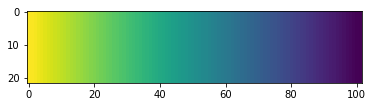

In [133]:
pylab.imshow(phi_mat)

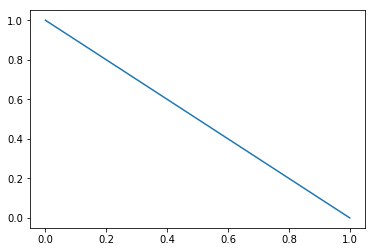

In [134]:
pylab.plot(xfv,phi_mat[10,:])

Now let's integrate over the time. The general time integration is as follows:
$$\int_t^{t+\Delta t}{\phi_P dt} = (f \phi_P^{N+1} + (1-f)\phi_P^N)\Delta t$$ 
where $f$ is the implicitness parameter from 0 to 1, $\phi_P^{N+1}$ is the value at time $t+\Delta t$ and $\phi_P^N$ is the value at time $t$.

Two most popular discretizations are implicit discretization ($f=1$) and Crank-Nicolson discretization ($f=0.5$).

So the equations containing temporal parts are as follows (here we indicate only bulk equation to save some space, but everything else is similar):
$$
\Delta x \Delta y \frac{ \phi_{i,j}^{N+1}-\phi_{i,j}^N}{\Delta t} = f\Biggl(-\Bigl(\frac{\Delta y}{x_{i+1}-x_i}+\frac{\Delta y}{x_i-x_{i-1}}+\frac{\Delta x}{y_{j+1}-y_j}+\frac{\Delta x}{y_j-y_{j-1}}\Bigr) \phi^{N+1}_{i,j} +  \frac{\Delta y}{x_i-x_{i-1}}\phi^{N+1}_{i-1,j} + \frac{\Delta y}{x_{i+1}-x_i}\phi^{N+1}_{i+1,j} +\frac{\Delta x}{y_j - y_{j-1}}  \phi^{N+1}_{i,j-1} + \frac{\Delta x}{y_{j+1}-y_j}\phi^{N+1}_{i,j+1}\Biggr) + (1-f)\Biggl(-\Bigl(\frac{\Delta y}{x_{i+1}-x_i}+\frac{\Delta y}{x_i-x_{i-1}}+\frac{\Delta x}{y_{j+1}-y_j}+\frac{\Delta x}{y_j-y_{j-1}}\Bigr) \phi^N_{i,j} +  \frac{\Delta y}{x_i-x_{i-1}}\phi^N_{i-1,j} + \frac{\Delta y}{x_{i+1}-x_i}\phi^N_{i+1,j} +\frac{\Delta x}{y_j - y_{j-1}}  \phi^N_{i,j-1} + \frac{\Delta x}{y_{j+1}-y_j}\phi^N_{i,j+1}\Biggr)\text{ for }i=1..NX\text{ and }j=1..NY
$$

So we need to reconstruct the matrix and its BCs:

In [135]:
print("Deltax = ", deltax)
print("Deltay = ", deltay)

Deltax =  0.01
Deltay =  0.1


In [136]:
# Parameters related to the time-stepping
f = 1.0
deltat = 0.001

def updateMatrix(mat,rhs,phi_old):
    rhs[:] = 0.0
    mat[:,:] = 0.0
    for j in range(NY+2):
        rhs[convert(0,j)] = 1
        rhs[convert(NX+1,j)] = 0
        mat[convert(0,j),convert(0,j)] = 1
        mat[convert(NX+1,j),convert(NX+1,j)] = 1

    for i in range(1,NX+1):
        mat[convert(i,0),convert(i,0)]=1
        mat[convert(i,0),convert(i,1)]=-1
        mat[convert(i,NY+1),convert(i,NY+1)]=1
        mat[convert(i,NY+1),convert(i,NY)]=-1

    for i in range(1,NX+1):  
        for j in range(1,NY+1):
            ce=deltay/(xfv[i+1]-xfv[i])
            cw=deltay/(xfv[i]-xfv[i-1])
            cs=deltax/(yfv[j]-yfv[j-1])
            cn=deltax/(yfv[j+1]-yfv[j]) 
            mat[convert(i,j),convert(i,j)] = deltax*deltay/deltat + ce + cw + cs + cn
            mat[convert(i,j),convert(i,j+1)] = -cn
            mat[convert(i,j),convert(i,j-1)] = -cs
            mat[convert(i,j),convert(i-1,j)] = -cw
            mat[convert(i,j),convert(i+1,j)] = -ce
            rhs[convert(i,j)] = deltax*deltay/deltat*phi_old[convert(i,j)] + (1-f)*(-(ce+cw+cs+cn)*phi_old[convert(i,j)]
                                                                                    + cn*phi_old[convert(i,j+1)] 
                                                                                    + cs*phi_old[convert(i,j-1)]
                                                                                    + cw*phi_old[convert(i-1,j)]
                                                                                    + ce*phi_old[convert(i+1,j)])
            
    print("RHS=",rhs)
           

Let's find the analytical solution for the problem:
$$
\partial_t \phi = \partial_x^2 \phi, \text{ with }\phi(x,t=0)=0, \phi(x=0) = 1, \phi(x=l)=0
$$

We actually know the solution for the following equation:
$$
\partial_t w = \alpha \partial_x^2 w, \text{ with } w(x,t=0)=f(x), w(x=0,t)=0, w(x=l,t)=0
$$
The solution is the following:
$$
\begin{aligned}
&w(x,t)=\sum_{k=1}^{\infty}{\beta_k \sin(\frac{k \pi}{l} x)\exp\bigl(-\alpha \frac{\pi^2 k^2 t}{l^2}\bigr)}\\
&\beta_k = \frac{2}{l}\int_0^l{f(x) \sin(\frac{k \pi}{l} x) dx}
\end{aligned}
$$
Let's separate the solution for $\phi$ into homogenous and particular parts:
$$
\phi = l-x + \phi_h,
$$
where $\phi_h(x=0,t) = 0$, $\phi_h(x=l,t)=0$, $\phi_h(x,t=0)=x-l$.

Transfering this equation we see that $f(x)=x-l$, $l = 1$, $\alpha = 1$. The solution for homogenuous part is the following:
$$
\begin{aligned}
&\phi_h(x,t)=\sum_{k=1}^{\infty}{\beta_k \sin(\frac{k \pi}{l} x)\exp\bigl(-\alpha \frac{\pi^2 k^2}{l^2} t\bigr)}\\
&\beta_k = \frac{2}{l}\int_0^l{(x-l) \sin(\frac{k \pi}{l} x) dx}=-\frac{2 l}{k\pi}
\end{aligned}
$$
Then the homogenuous part is the following:
$$
\phi_h(x,t) = -\sum_{k=1}^{\infty}{\frac{2 l}{k\pi}\sin(\frac{k \pi}{l} x)\exp\bigl(-\alpha \frac{\pi^2 k^2}{l^2} t\bigr)}
$$
Then the analytical solution is the following:
$$
\phi(x,t)=l-x-\sum_{k=1}^{\infty}{\frac{2 l}{k\pi}\sin(\frac{k \pi}{l} x)\exp\bigl(-\alpha \frac{\pi^2 k^2}{l^2} t\bigr)}
$$

In [137]:
def analytical(time):
    numTerms = 400
    numX = 101

    x=numpy.linspace(0,LX,numX)
    sol = LX - x
    alpha = 1.0
    for term in range(1,numTerms+1):
        sol = sol - 2.0*LX/(term*numpy.pi)*numpy.sin(term * numpy.pi*x/LX)*numpy.exp(-alpha*(numpy.pi**2)*(term**2)/(LX**2)*time)
    return x,sol

def simple(mat2,rhs2,phi2_old):
    mat2[0,0]=1
    mat2[NX,NX]=1
    rhs2[0]=1
    rhs2[NX]=0
    print("Deltax = ", deltax, " Deltat=", deltat, "f=",f)
    for i in range(1,NX):
        mat2[i,i] = deltax*deltax/deltat+2*f
        mat2[i,i+1]=-f
        mat2[i,i-1]=-f
        rhs2[i]=deltax*deltax/deltat*phi2_old[i]+(1-f)*(phi2_old[i+1]-2*phi2_old[i]+phi2_old[i-1])
    
    

In [138]:
import time
from IPython import display
totalTime = 0.003
numIterations = int(ceil(totalTime/deltat))
print("Number of iterations",numIterations)

Number of iterations 3


RHS= [ 1.  0.  0. ...,  0.  0.  0.]
Deltax =  0.01  Deltat= 0.001 f= 1.0
Iteration =  1
RHS= [ 1.  0.  0. ...,  0.  0.  0.]
Deltax =  0.01  Deltat= 0.001 f= 1.0
Iteration =  2
RHS= [ 1.  0.  0. ...,  0.  0.  0.]
Deltax =  0.01  Deltat= 0.001 f= 1.0
Iteration =  3


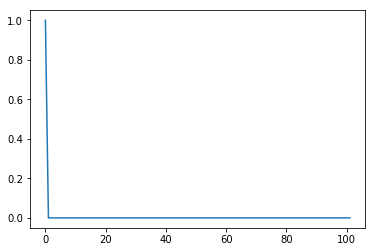

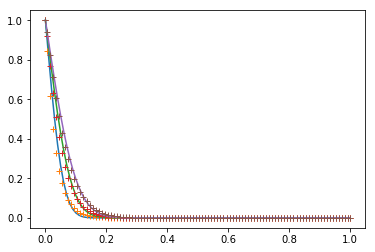

In [139]:
mat2=numpy.zeros((NX+1,NX+1))
rhs2=numpy.zeros((NX+1,))
xfd=numpy.linspace(0,LX,NX+1)
phi2=numpy.zeros((NX+1,))
phi2[0]=1

phi=numpy.zeros(((NY+2)*(NX+2),))
for j in range(NY+2):
    phi[convert(0,j)] = 1.0
pylab.figure(1)
pylab.plot(phi[int(NY/2)*(NX+2):(int(NY/2)+1)*(NX+2)])

for iteration in range(1,numIterations+1):
    phi_old = phi
    phi2_old = phi2
    
    rhs = numpy.zeros(((NY+2)*(NX+2),))
    mat = numpy.zeros(((NX+2)*(NY+2),(NX+2)*(NY+2)))
    rhs2=numpy.zeros((NX+1,))
    mat2=numpy.zeros((NX+1,NX+1))
 
    updateMatrix(mat,rhs,phi_old)
    simple(mat2,rhs2,phi2_old)
    phi = numpy.linalg.solve(mat,rhs)
    phi2 = numpy.linalg.solve(mat2,rhs2)
    
    phi_mat=phi.reshape((NY+2,NX+2))
    print("Iteration = ",iteration)
    #display.clear_output(wait=True)
    #display.display(pylab.gcf())
    
    pylab.figure(2)
    xan,an = analytical(iteration*deltat)
    pylab.plot(xan,an)
    pylab.plot(xfv,phi_mat[10,:],"+")
    #pylab.plot(xfd,phi2,"d")
    time.sleep(0.1)

## Advection-Diffusion Equation

Now let's turn our attention to the convection-diffusion problem. The case we would like to tackle first is the steady-state development of the thermal layer with the constant velocity $U_0$ in the channel of the height $H$ that we will simulate on our 2D framework. We also assume that the Peclet number is high, i.e. $Pe=\frac{U_0 H}{\Gamma}$. In this case we can neglect the diffusion in the $x$ direction. The problem is then stated as:
$$
U_0 \frac{d} {d x}\phi = \Gamma \frac{d^2}{d y^2}\phi 
$$
with the following boundary conditions:
$$
\begin{aligned}
&\phi(x,y=0) = \phi^{*}\\
&\frac{d}{d y}\phi(x,y=H) = 0\\
&\phi(x=0,y) = 0\\
\end{aligned}
$$
As always we can search the soluition in terms of homogenous and particular solutions, i.e. $\phi=\phi_h + \phi^{*}$. In this case the boundary conditions would change to the following:
$$
\begin{aligned}
&\phi_h(x,y=0) = 0\\
&\frac{d}{d y}\phi_h(x,y=H) = 0\\
&\phi_h(x=0,y) = -\phi^{*}
\end{aligned}
$$

The solution is searched by separation of variables, i.e. $$\phi_h = \Theta(x)\Phi(y)$$. That would lead to the following equation:
$$
\frac{\dot{\Theta}}{\Theta} \frac{U_0}{\Gamma} = \frac{\ddot{\Phi}}{\Phi} = -m^2
$$

For $\Theta$ function the solution is rerpresented through the eigenvalues as:
$$
\Theta = \exp\Bigl(-\frac{\Gamma}{U_0} m^2 x\Bigr)
$$

For $\Phi$ the solution is represented by the summation of two functions:
$$
\Phi(y) = C_1 \sin(m y) + C_2 \cos(m y)
$$

The boundary conditions are then represented as follows:
$$
\begin{aligned}
&\Phi(y=0) = C_2 = 0\\
&\dot{\Phi}(y=H) = C_1 \cos(m H) = 0
\end{aligned}
$$
Then the eigenvalue $m$ can be found as $m=(\pi/2+\pi k)/H$, where $k=0\ldots\infty$.

Substitution of the solution to the last boundary condition yields the following:
$$
\sum_{k=0}^{\infty}{C_k \sin\bigl(\pi (k +\frac{1}{2}) \frac{y}{H}\bigr)} = -\phi^{*}
$$

Integratign and multiplying both sides on $\sin(\pi k y/H)$ one can obtain the following:
$$
C_k\int_{0}^{H}{\sin\bigl(\pi (k+\frac{1}{2}) \frac{y}{H} \bigr)^2 d y} = -\phi^* \int_0^{H}{\sin\bigl(\pi (k+\frac{1}{2}) \frac{y}{H} \bigr) dy }
$$

From here one can obtain the expression for $C_k$:
$$
C_k = -\frac{2}{\pi \bigl(k+\frac{1}{2}\bigr)} \phi^{*}
$$

Alltogether the solution is the following:
$$
\begin{aligned}
&\phi = \phi^* - \phi^* \sum_{k=0}^{\infty}{\frac{2}{\pi \bigl(k+\frac{1}{2}\bigr)} \sin \bigl(\pi (k+\frac{1}{2})\frac{y}{H}\bigr)\exp\bigl(-\pi^2 (k+\frac{1}{2})^2 \frac{\Gamma}{U_0 H}\frac{x}{H}\bigr)}\\
&\phi = \phi^* - \phi^* \sum_{k=0}^{\infty}{\frac{2}{\pi \bigl(k+\frac{1}{2}\bigr)} \sin \bigl(\pi (k+\frac{1}{2})\frac{y}{H}\bigr)\exp\bigl(-\pi^2 (k+\frac{1}{2})^2 \frac{1}{Pe}\frac{x}{H}\bigr)}\\
\end{aligned}
$$

In [140]:
peclet = 200.0
xlayer = numpy.linspace(0,10,101)
ylayer = numpy.linspace(0,1,21)
phistar = 1.0

In [141]:
numterms = 100
phi = numpy.zeros((len(ylayer),len(xlayer)))
for term in range(0,numterms+1):
    cols = 2.0/(numpy.pi*(term+0.5))*numpy.sin(numpy.pi*(term+0.5)*ylayer)
    for ind,col in enumerate(cols):
        phi[ind,:]=phi[ind,:]-phistar*col*numpy.exp(-numpy.pi*numpy.pi*(term+0.5)*(term+0.5)/peclet*xlayer)
phi=phi+phistar

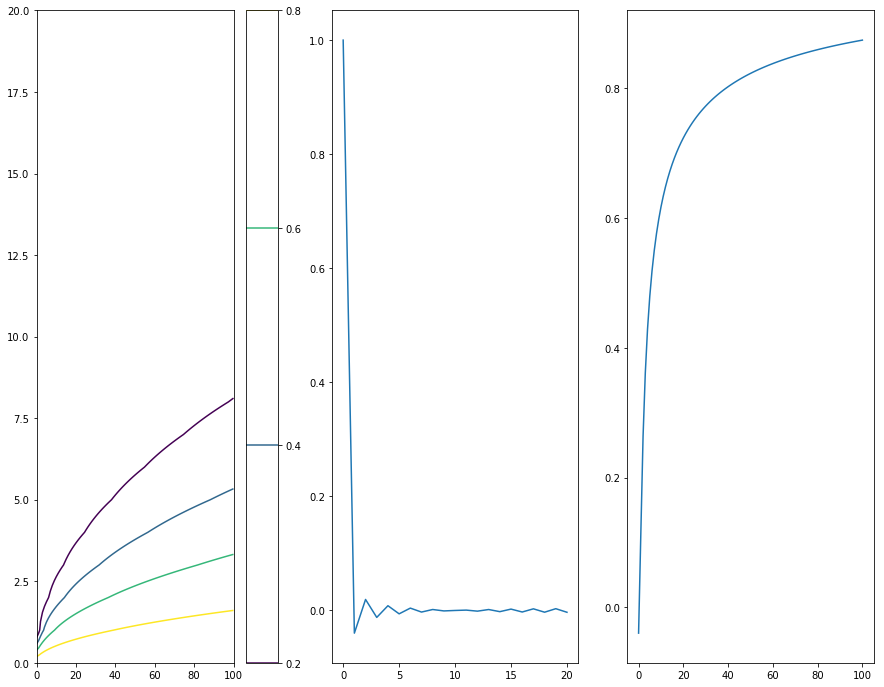

In [142]:
figs,axes=pylab.subplots(1,3,figsize=(15,12))
pylab.subplot(131)
cont=pylab.contour(phi,levels=[0.2,0.4,0.6,0.8])
pylab.colorbar(cont)
pylab.subplot(132)
pylab.plot(phi[:,0])
pylab.subplot(133)
pylab.plot(phi[1,:])

Let's check whether the solution can be verified via error function. There is a solution for the thermal layer development that looks very similar to our solution. The equations look like as follows (see Ozisik, the best book for heat conduction problems):
$$
\frac{1}{\alpha}\frac{\partial T}{\partial t} = \frac{\partial^2 T}{\partial x^2},
$$
with the following boundary conditions:
$$
\begin{aligned}
&T(x=0,t)=0\\
&T(x,t=0)=T_0
\end{aligned}
$$
The solution here is the following:
$$
\frac{T(x,t)}{T_0}=\mathbf{erf}\Bigl(\frac{x}{\sqrt{4\alpha t}}\Bigr)
$$

If we translate it to our conditions, then $\alpha = \Gamma$, $x=U_0 t$, $y=x$. Then the solution is the following:
$$
\begin{aligned}
&\phi = \phi^* - \phi^* \mathbf{erf}\Bigl(\frac{y/H}{\sqrt{4 x/H \frac{\Gamma}{U_0 H}}}\Bigr)\\
&\phi = \phi^* - \phi^* \mathbf{erf}\Bigl(\frac{y/H}{\sqrt{4 x/H \frac{1}{Pe}}}\Bigr)
\end{aligned}
$$

In [143]:
import scipy.special
phi_error = numpy.zeros((len(ylayer),len(xlayer)))
cols = numpy.sqrt(4.0*xlayer/peclet)
for ind,col in enumerate(cols):
    phi_error[:,ind]=phi_error[:,ind]-phistar*scipy.special.erf(ylayer/col)
phi_error=phi_error+phistar

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


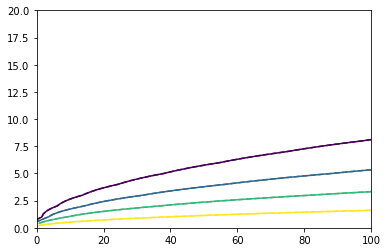

In [144]:
pylab.contour(phi_error,levels=[0.2,0.4,0.6,0.8])
pylab.contour(phi,linestyles=["dashed"],levels=[0.2,0.4,0.6,0.8])

Now let's try to program it using different techniques:

In [145]:
NX=100
NY=20
LX = 10.0
LY = 1.0
deltax = LX/NX
deltay = LY/NY

xfv_layer = numpy.zeros((NX+2,))
xfv_layer[NX+1] = LX
xfv_layer[1:NX+1] = numpy.linspace(0.5*deltax,LX-0.5*deltax,NX)
yfv_layer = numpy.zeros((NY+2,))
yfv_layer[NY+1] = LY
yfv_layer[1:NY+1] = numpy.linspace(0.5*deltay,LY-0.5*deltay,NY)

print("DeltaX = ", deltax, " DeltaY = ", deltay)
print("X = ", xfv_layer)
print("Y = ", yfv_layer)

DeltaX =  0.1  DeltaY =  0.05
X =  [  0.     0.05   0.15   0.25   0.35   0.45   0.55   0.65   0.75   0.85
   0.95   1.05   1.15   1.25   1.35   1.45   1.55   1.65   1.75   1.85
   1.95   2.05   2.15   2.25   2.35   2.45   2.55   2.65   2.75   2.85
   2.95   3.05   3.15   3.25   3.35   3.45   3.55   3.65   3.75   3.85
   3.95   4.05   4.15   4.25   4.35   4.45   4.55   4.65   4.75   4.85
   4.95   5.05   5.15   5.25   5.35   5.45   5.55   5.65   5.75   5.85
   5.95   6.05   6.15   6.25   6.35   6.45   6.55   6.65   6.75   6.85
   6.95   7.05   7.15   7.25   7.35   7.45   7.55   7.65   7.75   7.85
   7.95   8.05   8.15   8.25   8.35   8.45   8.55   8.65   8.75   8.85
   8.95   9.05   9.15   9.25   9.35   9.45   9.55   9.65   9.75   9.85
   9.95  10.  ]
Y =  [ 0.     0.025  0.075  0.125  0.175  0.225  0.275  0.325  0.375  0.425
  0.475  0.525  0.575  0.625  0.675  0.725  0.775  0.825  0.875  0.925
  0.975  1.   ]


The boundary conditions are the following for discretized version:
$$
\begin{aligned}
&\phi(x=0,y) = 0\\
&\phi(x,y=0) = 1\\
&\partial_x \phi(x=L,y) = 0\\
&\partial_y \phi(x,y=H) = 0\\
\end{aligned}
$$
In terms of numerical values the following are enforced:
$$
\begin{aligned}
&\phi_{0,0..NY+1}=0\\
&\phi_{1..NX,0}=1\\
&\frac{\partial \phi_{1..NX,NY+1}}{\partial y} = 0\\
&\frac{\partial \phi_{NX+1,0..NY+1}}{\partial x} = 0\\
\end{aligned}
$$

The discretization would be the following:
$$
\Delta y_P \Bigl(\bigl(U_0 \phi\bigr)_e-\bigl(U_0 \phi\bigr)_w\Bigr)=\Delta x_P \biggl(\Gamma_n \frac{\phi_N-\phi_P}{\Delta y_n}-\Gamma_s \frac{\phi_P - \phi_S}{\Delta y_s}\biggr)
$$

Let us examine the following discretizations (central and upwind):
$$
\textbf{Central:}
\begin{aligned}
&\phi_e = 0.5(\phi_E+\phi_P)\\
&\phi_w = 0.5(\phi_P+\phi_W)\\
\end{aligned}
\textbf{Upwind:}
\begin{aligned}
&\phi_e = \phi_P \text{ for } U_0 > 0\\
&\phi_e = \phi_E \text{ for } U_0 < 0\\
&\phi_w = \phi_W \text{ for } U_0 > 0\\
&\phi_w = \phi_P \text{ for } U_0 < 0\\
\end{aligned}
$$

# Central scheme

The central scheme becomes:
$$
\begin{aligned}
&\Delta y_P U_0 \frac{\phi_E-\phi_W}{2} = \Delta x_P \Gamma\Bigl(\frac{\phi_N-\phi_P}{\Delta y_N} - \frac{\phi_P - \phi_S}{\Delta y_S}\Bigr)\\
&\Delta y_P/H \frac{\phi_E-\phi_W}{2} = \Delta x_P/H \frac{\Gamma}{U_0 H}\Bigl(\frac{\phi_N-\phi_P}{\Delta y_N /H} - \frac{\phi_P - \phi_S}{\Delta y_S /H}\Bigr)
\end{aligned}
$$

Collecting coefficients with $\phi_P$ and others one can get (assuming that all $\Delta x$ or $\Delta y$ are non-dimensional:
$$
\begin{aligned}
-\phi_P\frac{1}{Pe}\Bigl(\frac{\Delta x_P}{\Delta y_N} + \frac{\Delta x_P}{\Delta y_S}\Bigr) +\frac{1}{Pe}\frac{\Delta x_P}{\Delta y_N}\phi_N + \frac{1}{Pe}\frac{\Delta x_P}{\Delta y_S}\phi_S - 0.5 \Delta y_P \phi_E - 0.5 \Delta y_P \phi_W = 0 
\end{aligned}
$$

The numerical scheme (centra) is the following:
$$
\begin{aligned}
&-\phi_{i,j}\frac{1}{Pe}\Bigl(\frac{\Delta x}{y_{i,j+1}-y_{i,j}} + \frac{\Delta x}{y_{i,j}-y_{i,j-1}}\Bigr) +\frac{1}{Pe}\frac{\Delta x}{y_{i,j+1}-y_{i,j}}\phi_{i,j+1} + \frac{1}{Pe}\frac{\Delta x}{y_{i,j}-y_{i,j-1}}\phi_{i,j-1} - 0.5 \Delta y \phi_{i+1,j} + 0.5 \Delta y \phi_{i-1,j} = 0 \text{ for }i=1..NX\text{ and }j=1..NY\\
&\phi_{0,j} = 0\text{ for }j=0..NY+1\\
&\phi_{NX+1,j} = \phi_{NX,j}\text{ for }j=0..NY+1\\
&\phi_{i,0}=1\text{ for }i=1..NX\\
&\phi_{i,NY+1}=\phi_{i,NY}\text{ for }i=1..NX\\
\end{aligned}$$

In [146]:
def convert(indX,indY):
    return (indY*(NX+2)+indX)

rhs_layer = numpy.zeros(((NY+2)*(NX+2),))
mat_layer = numpy.zeros(((NX+2)*(NY+2),(NX+2)*(NY+2)))

for j in range(NY+2):
    rhs_layer[convert(0,j)] = 0
    mat_layer[convert(0,j),convert(0,j)] = 1
    mat_layer[convert(NX+1,j),convert(NX+1,j)] = 1
    mat_layer[convert(NX+1,j),convert(NX,j)] = -1
    
for i in range(1,NX+1):
    rhs_layer[convert(i,0)] = 1
    mat_layer[convert(i,0),convert(i,0)]=1
    mat_layer[convert(i,NY+1),convert(i,NY+1)]=1
    mat_layer[convert(i,NY+1),convert(i,NY)]=-1
    
for i in range(1,NX+1):   
    for j in range(1,NY+1):
        mat_layer[convert(i,j),convert(i,j)] = - 1.0/peclet*(deltax/(yfv_layer[j+1]-yfv_layer[j]) + deltax/(yfv_layer[j]-yfv_layer[j-1]))
        mat_layer[convert(i,j),convert(i,j+1)] = 1.0/peclet*deltax/(yfv_layer[j+1]-yfv_layer[j])
        mat_layer[convert(i,j),convert(i,j-1)] = 1.0/peclet*deltax/(yfv_layer[j]-yfv_layer[j-1])
        mat_layer[convert(i,j),convert(i-1,j)] = 0.5*deltay
        mat_layer[convert(i,j),convert(i+1,j)] = -0.5*deltay

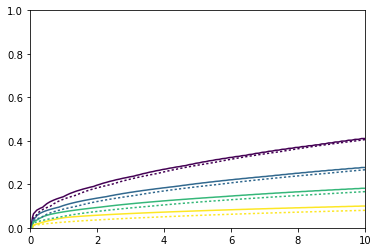

In [147]:
phi_layer = numpy.linalg.solve(mat_layer,rhs_layer)
phi_mat_layer=phi_layer.reshape((NY+2,NX+2))
pylab.contour(phi_mat_layer,levels=[0.2,0.4,0.6,0.8],extent=(0,10,0,1))
pylab.contour(phi_error,levels=[0.2,0.4,0.6,0.8],extent=(0,10,0,1),linestyles=["dotted"])

# Upwind scheme

The scheme would be slightly different:
$$
\begin{aligned}
&\Delta y_P U_0 (\phi_P-\phi_W) = \Delta x_P \Gamma\Bigl(\frac{\phi_N-\phi_P}{\Delta y_N} - \frac{\phi_P - \phi_S}{\Delta y_S}\Bigr)\\
&\Delta y_P/H (\phi_P-\phi_W) = \Delta x_P/H \frac{\Gamma}{U_0 H}\Bigl(\frac{\phi_N-\phi_P}{\Delta y_N /H} - \frac{\phi_P - \phi_S}{\Delta y_S /H}\Bigr)
\end{aligned}
$$

Then the discretization would be changes as follows:
$$
\begin{aligned}
-\phi_P\biggl(\frac{1}{Pe}\Bigl(\frac{\Delta x_P}{\Delta y_N} + \frac{\Delta x_P}{\Delta y_S}\Bigr)+\Delta y_P\biggr) +\frac{1}{Pe}\frac{\Delta x_P}{\Delta y_N}\phi_N + \frac{1}{Pe}\frac{\Delta x_P}{\Delta y_S}\phi_S + \Delta y_P \phi_W = 0 
\end{aligned}
$$

Let's redefine the matrix only:

In [148]:
rhs_layer = numpy.zeros(((NY+2)*(NX+2),))
mat_layer = numpy.zeros(((NX+2)*(NY+2),(NX+2)*(NY+2)))

for j in range(NY+2):
    rhs_layer[convert(0,j)] = 0
    mat_layer[convert(0,j),convert(0,j)] = 1
    mat_layer[convert(NX+1,j),convert(NX+1,j)] = 1
    mat_layer[convert(NX+1,j),convert(NX,j)] = -1
    
for i in range(1,NX+1):
    rhs_layer[convert(i,0)] = 1
    mat_layer[convert(i,0),convert(i,0)]=1
    mat_layer[convert(i,NY+1),convert(i,NY+1)]=1
    mat_layer[convert(i,NY+1),convert(i,NY)]=-1

for i in range(1,NX+1):   
    for j in range(1,NY+1):
        mat_layer[convert(i,j),convert(i,j)] = - 1.0/peclet*(deltax/(yfv_layer[j+1]-yfv_layer[j]) + deltax/(yfv_layer[j]-yfv_layer[j-1]))-deltay
        mat_layer[convert(i,j),convert(i,j+1)] = 1.0/peclet*deltax/(yfv_layer[j+1]-yfv_layer[j])
        mat_layer[convert(i,j),convert(i,j-1)] = 1.0/peclet*deltax/(yfv_layer[j]-yfv_layer[j-1])
        mat_layer[convert(i,j),convert(i-1,j)] = deltay

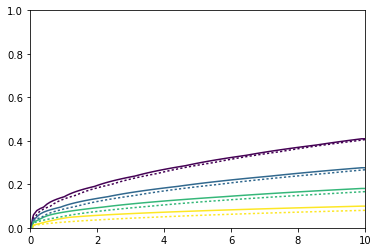

In [149]:
phi_layer = numpy.linalg.solve(mat_layer,rhs_layer)
phi_mat_layer=phi_layer.reshape((NY+2,NX+2))
pylab.contour(phi_mat_layer,levels=[0.2,0.4,0.6,0.8],extent=(0,10,0,1))
pylab.contour(phi_error,levels=[0.2,0.4,0.6,0.8],linestyles=["dotted"],extent=(0,10,0,1))